## 🎬 Movie Rating Predictor: Scraping & Machine Learning for Rating and Hit/Flop Prediction

### Dataset Info / Acknowledgment

In [4]:
# IMDb Top 250 Movie Rating Predictor

## Dataset Information
"""
- This dataset contains 218 top movies out of IMDb Top 250 (some movies skipped due to missing data in OMDb API).
- Columns included: `Title`, `Year`, `Genre`, `Runtime`, `Director`, `IMDb Rating`, `Rotten Tomatoes Score`.
- **Important:** The dataset was **manually created by using OMDb API with my personal API key**. 
  I fetched each movie's information programmatically and compiled it into a CSV file.
- API reference: [OMDb API](http://www.omdbapi.com/)
"""

"\n- This dataset contains 218 top movies out of IMDb Top 250 (some movies skipped due to missing data in OMDb API).\n- Columns included: `Title`, `Year`, `Genre`, `Runtime`, `Director`, `IMDb Rating`, `Rotten Tomatoes Score`.\n- **Important:** The dataset was **manually created by using OMDb API with my personal API key**. \n  I fetched each movie's information programmatically and compiled it into a CSV file.\n- API reference: [OMDb API](http://www.omdbapi.com/)\n"

### Project Introduction

In [13]:
## Project Overview
"This project predicts IMDb ratings of top movies based on features such as genre, runtime, year, and director. "
"It also classifies movies as Hit or Flop."

### Steps:
"""1. Data Loading & Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Regression Model (IMDb Rating Prediction)
5. Classification Model (Hit / Flop)
6. Visualization & Dashboard
"""

'1. Data Loading & Cleaning\n2. Exploratory Data Analysis (EDA)\n3. Feature Engineering\n4. Regression Model (IMDb Rating Prediction)\n5. Classification Model (Hit / Flop)\n6. Visualization & Dashboard\n'

### IMPORT LIBRARIES

In [16]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# LOADING DATA.......

df = pd.read_csv('IMDb_Top250.csv')  # dataset created using OMDb API with personal API key

In [28]:
# Check first 5 rows
df.head()

,Title,Year,Genre,Runtime,Director,IMDb_Rating,RT_Score
0,The Shawshank Redemption,1994,Drama,142 min,Frank Darabont,9.3,89%
1,The Godfather,1972,"Crime, Drama",175 min,Francis Ford Coppola,9.2,97%
2,The Dark Knight,2008,"Action, Crime, Drama",152 min,Christopher Nolan,9.1,94%
3,The Godfather Part II,1974,"Crime, Drama",202 min,Francis Ford Coppola,9.0,96%
4,12 Angry Men,1957,"Crime, Drama",96 min,Sidney Lumet,9.0,100%


In [30]:
df.tail()

,Title,Year,Genre,Runtime,Director,IMDb_Rating,RT_Score
213,Sanju,2018,"Biography, Comedy, Drama",155 min,Rajkumar Hirani,7.6,41%
214,Uri: The Surgical Strike,2019,"Action, Drama, History",138 min,Aditya Dhar,8.2,57%
215,Kesari,2019,"Action, Drama, History",150 min,Anurag Singh,7.4,35%
216,Jab We Met,2007,"Comedy, Drama, Romance",138 min,Imtiaz Ali,7.9,100%
217,3 Idiots,2009,"Comedy, Drama",170 min,Rajkumar Hirani,8.4,100%


In [32]:
# INSPECTING DATA.....

df.info() 
df.shape 
# FOR MISSING VALUES......

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        218 non-null    object 
 1   Year         218 non-null    object 
 2   Genre        218 non-null    object 
 3   Runtime      215 non-null    object 
 4   Director     216 non-null    object 
 5   IMDb_Rating  216 non-null    float64
 6   RT_Score     200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 12.1+ KB


Title           0
Year            0
Genre           0
Runtime         3
Director        2
IMDb_Rating     2
RT_Score       18
dtype: int64

### DATA CLEANING.....

In [37]:
# -----------------------------
# Year: convert to numeric, handle invalid entries
# -----------------------------
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # invalid entries become NaN
# Drop rows with missing Year
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# -----------------------------
# Runtime: remove ' min', convert to numeric, fill missing with median
# -----------------------------
df['Runtime'] = df['Runtime'].str.replace(' min','')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Runtime'].fillna(df['Runtime'].median(), inplace=True)

# -----------------------------
# Director: fill missing with 'Unknown'
# -----------------------------
df['Director'].fillna('Unknown', inplace=True)

# -----------------------------
# IMDb_Rating: drop rows with missing values
# -----------------------------
df = df.dropna(subset=['IMDb_Rating'])

# -----------------------------
# RT_Score: remove '%', convert to numeric, keep NaN for missing
# -----------------------------
df['RT_Score'] = df['RT_Score'].str.replace('%','')
df['RT_Score'] = pd.to_numeric(df['RT_Score'], errors='coerce')

# -----------------------------
# Final check
# -----------------------------
print("Dataset info after cleaning:\n")
print(df.info())
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

Dataset info after cleaning:

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        215 non-null    object 
 1   Year         215 non-null    int64  
 2   Genre        215 non-null    object 
 3   Runtime      215 non-null    float64
 4   Director     215 non-null    object 
 5   IMDb_Rating  215 non-null    float64
 6   RT_Score     200 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.4+ KB
None

Missing values after cleaning:

Title           0
Year            0
Genre           0
Runtime         0
Director        0
IMDb_Rating     0
RT_Score       15
dtype: int64


### EDA - IMDb Rating Distribution

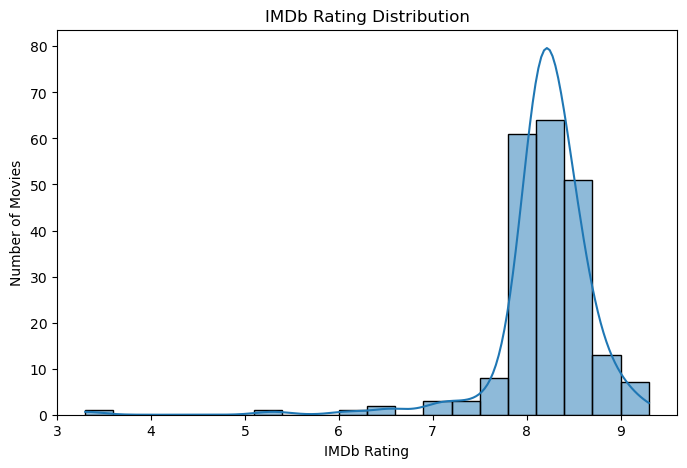

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df['IMDb_Rating'], bins=20, kde=True)
plt.title("IMDb Rating Distribution")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()

### EDA - Genre Wise Avg IMDb Rating

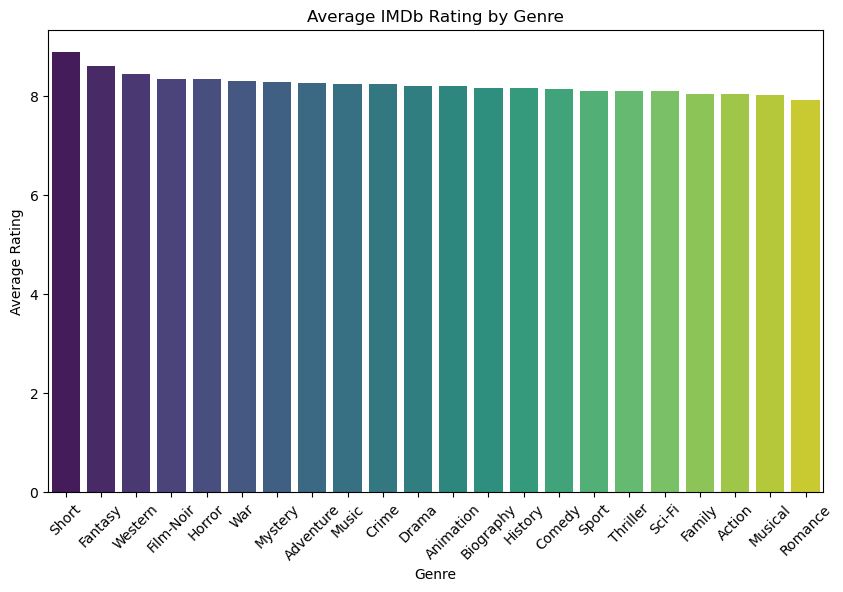

In [43]:
# Explode genres
df_genre = df.copy()
df_genre['Genre'] = df_genre['Genre'].str.split(', ')
df_genre = df_genre.explode('Genre')

# Avg rating by genre
genre_rating = df_genre.groupby('Genre')['IMDb_Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average IMDb Rating by Genre")
plt.ylabel("Average Rating")
plt.show()

### EDA - Year-wise Movie Count

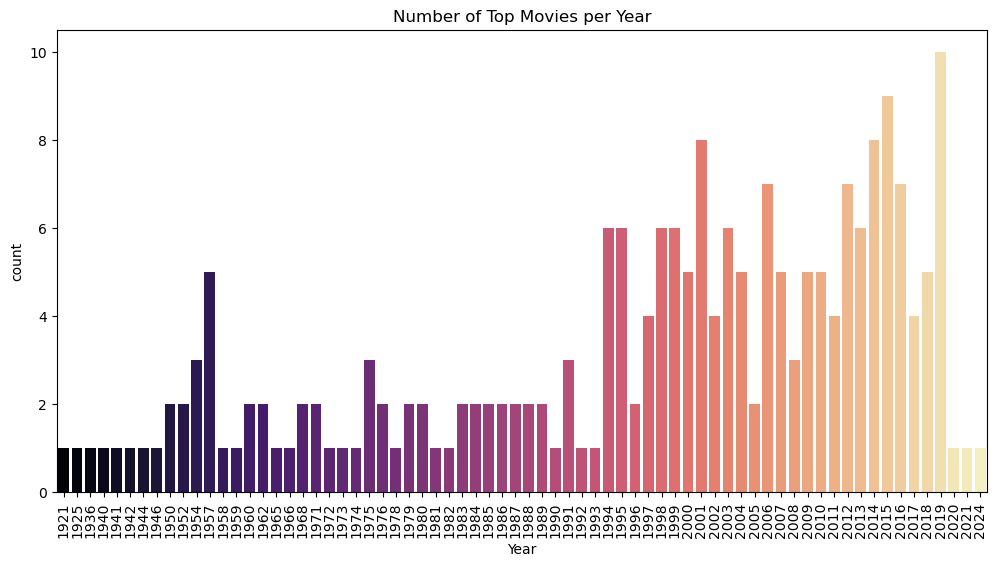

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', palette='magma')
plt.xticks(rotation=90)
plt.title("Number of Top Movies per Year")
plt.show()

### EDA - Top Directors by Avg IMDb Rating

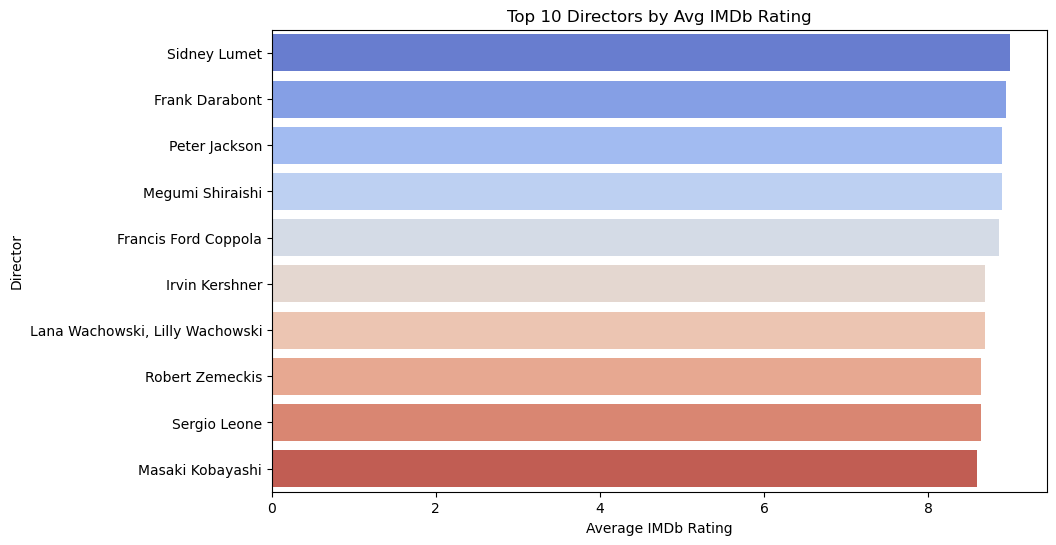

In [49]:
director_rating = df.groupby('Director')['IMDb_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=director_rating.values, y=director_rating.index, palette='coolwarm')
plt.title("Top 10 Directors by Avg IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.show()

### Feature Engineering

In [52]:
df_model = df.copy()

# Top 10 directors, rest = 'Other'
top_directors = df_model['Director'].value_counts().head(10).index
df_model['Director'] = df_model['Director'].apply(lambda x: x if x in top_directors else 'Other')

# One-Hot Encoding Genre + Director
df_model = pd.get_dummies(df_model, columns=['Genre','Director'], drop_first=True)

# Features & Target for Regression
X = df_model.drop(['Title','IMDb_Rating','RT_Score'], axis=1)
y = df_model['IMDb_Rating']

### Train-Test Split (Regression)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression Model - Linear Regression

In [58]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2 Score: {r2:.2f}")

Linear Regression MSE: 0.23
Linear Regression R2 Score: -0.82


### Regression Model - Random Forest

In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

Random Forest MSE: 0.31
Random Forest R2 Score: -1.46


### Classification - Hit / Flop

In [64]:
df_model['Hit_Flop'] = df_model['IMDb_Rating'].apply(lambda x: 1 if x >= 8.5 else 0)
y_class = df_model['Hit_Flop']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_c, y_train_c)
y_pred_c = logreg.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        36
           1       0.00      0.00      0.00         7

    accuracy                           0.81        43
   macro avg       0.42      0.49      0.45        43
weighted avg       0.70      0.81      0.75        43



### Regression Visualization - Predicted vs Actual

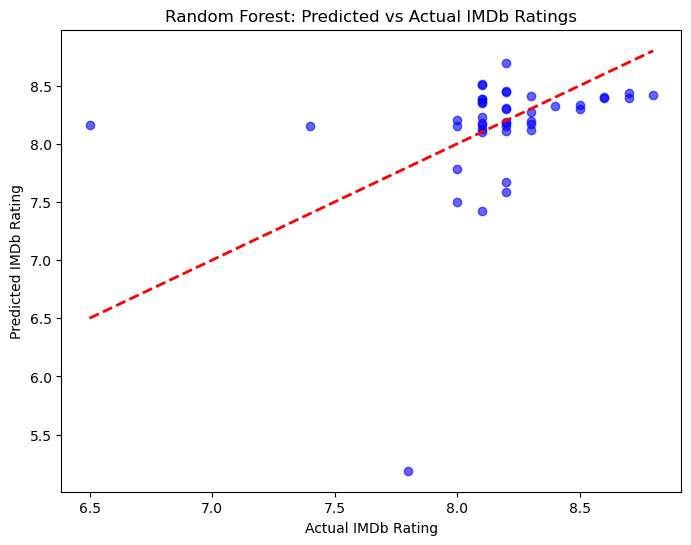

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual IMDb Rating")
plt.ylabel("Predicted IMDb Rating")
plt.title("Random Forest: Predicted vs Actual IMDb Ratings")
plt.show()

### Feature Importance (Random Forest)

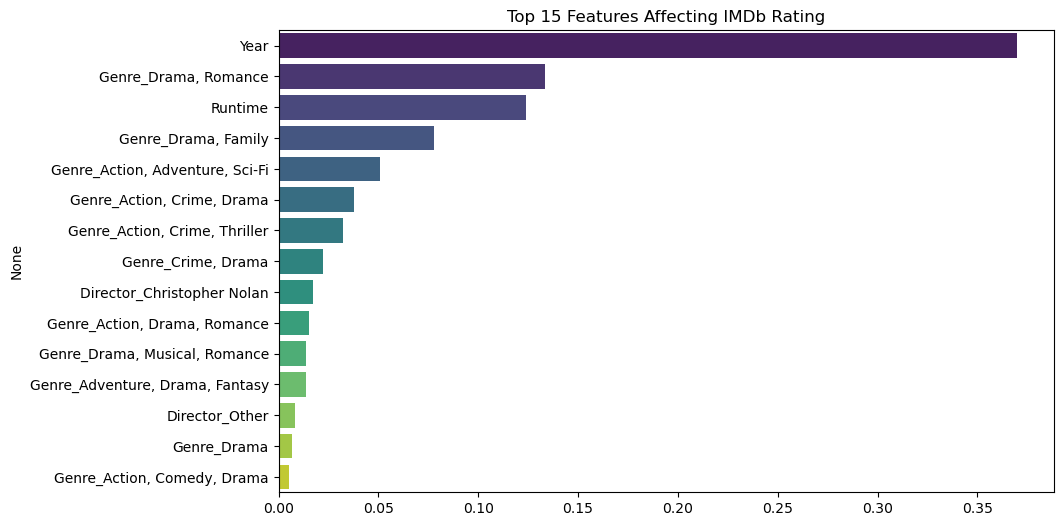

In [70]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 15 Features Affecting IMDb Rating")
plt.show()

### Classification Confusion Matrix

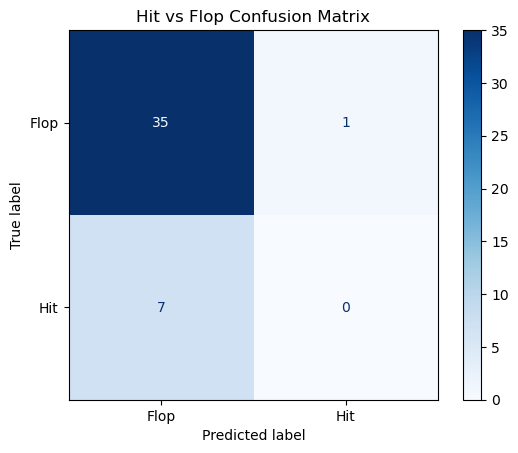

In [73]:
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Flop','Hit'])
disp.plot(cmap='Blues')
plt.title("Hit vs Flop Confusion Matrix")
plt.show()

### Year-wise Avg Rating Trend

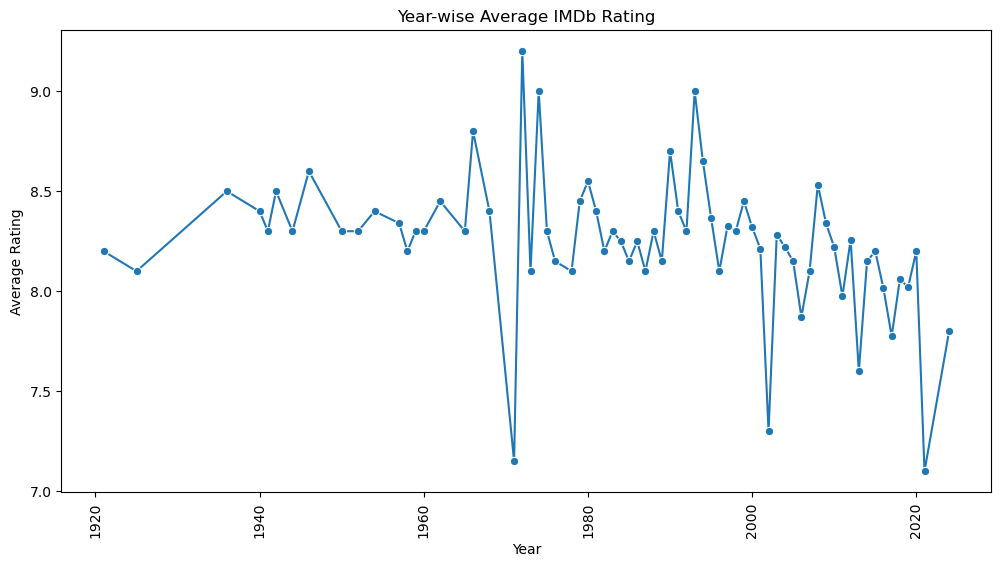

In [76]:
year_rating = df.groupby('Year')['IMDb_Rating'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_rating.index, y=year_rating.values, marker='o')
plt.xticks(rotation=90)
plt.title("Year-wise Average IMDb Rating")
plt.ylabel("Average Rating")
plt.show()

### Genre vs Avg Rating Wordcloud

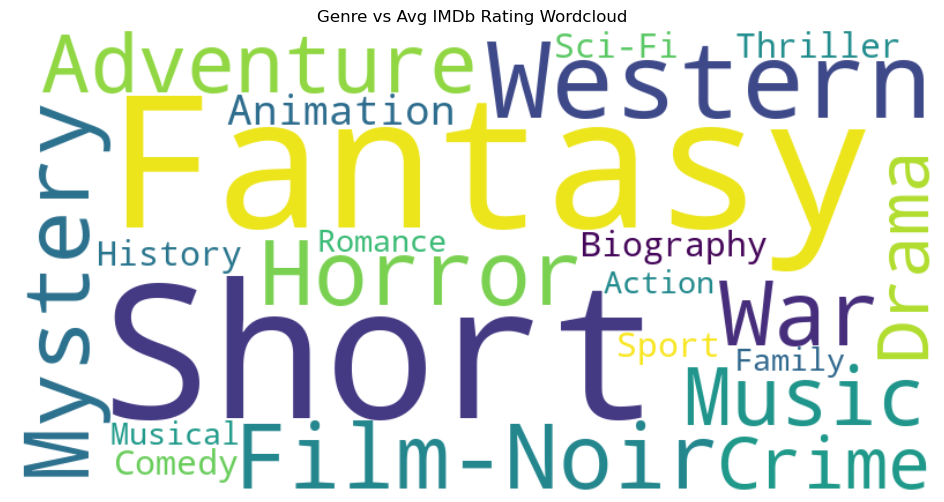

In [79]:
genre_rating_dict = genre_rating.to_dict()  # from Cell 6

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(genre_rating_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Genre vs Avg IMDb Rating Wordcloud")
plt.show()

### Save Important Plots

In [82]:
# Create folder if not exists
import os
if not os.path.exists('images'):
    os.makedirs('images')

# Example: save genre rating plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average IMDb Rating by Genre")
plt.ylabel("Average Rating")
plt.savefig('images/genre_rating.png')
plt.close()

# Similarly, save other plots like year trend, feature importance, confusion matrix

### SAVE MODEL

In [100]:
import joblib

# ---------------------------
# 1️⃣ Save Random Forest Regression Model
# ---------------------------
joblib.dump(rf, 'RandomForest_Regression_Model.pkl')

# ---------------------------
# 2️⃣ Save Logistic Regression Classification Model
# ---------------------------
joblib.dump(logreg, 'LogisticRegression_HitFlop_Model.pkl')

print("Models saved successfully!")

Models saved successfully!


### Load Saved Model (Future Use)

In [103]:
# Load models whenever chahiye
rf_loaded = joblib.load('RandomForest_Regression_Model.pkl')
logreg_loaded = joblib.load('LogisticRegression_HitFlop_Model.pkl')

# Example: Predict with loaded model
y_pred_new = rf_loaded.predict(X_test)  # regression
y_pred_class_new = logreg_loaded.predict(X_test_c)  # classification